---

## MARKET KENDARAAN BEKAS

### Masalah Inti Market Mobil Bekas : Asimetri Informasi

maksudnya itu seperti penjual yang tahu banyak soal mobil bekas akan bisa memainkan harga, di lain sisi pembeli tidak tahu harga yang seharusnya. karena hal ini lah, kepercayaan turun, dan volume pembelian menurun. oleh karena itu, kita akan membangun model prediksi yang secara akurat bisa menentukan harga yang sesuai berdasarkan spesifikasi dari mobil bekas itu sendiri. dengan ini, pemangku kepentingan seperti penjual bisa memberikan harga yang lebih wajar, tidak rugi karena menjual terlalu rendah atau kehilangan pelanggan karena menjual terlalu tinggi. pembeli yang bisa lebih trust dengan harga yang sedikit lebih pasti dan valid.

### Tujuan dan Pengukuran Kesuksesan

- Tujuan : membangun model machine learning regresi linear yang mampu secara akurat memprediksi harga mobil bekas dari fitur fiturnya.

- Metriks Teknis: Root Mean Square Error (RMSE). yang akan membandingkan harga hasil prediksi dengan harga aslinya. tapi dikuadratkan supaya model bisa lihat secara sensitif terhadap loss.

- Metriks Bisnis: Mean Absolute Error (MAE). bedanya cuma ini nilai yang lebih valid dan human.

model disini tidak hanya sebagai alat prediksi semata, namun juga bisa memberi tahu dengan valid dan masuk akal kenapa harga nya seperti itu. misal model bisa ngasi tau kalo harga bisa nurun sebesar X ketika mobil sudah berjalan M km. atau, mensegmentasi tipe mobil, sangat baik itu rata rata di atas X dollar.

---

## Exploratory Data Analysis (EDA)

tujuan EDA adalah memahami dataset, menguju asumsi awal serta mengidentifikasi pola untuk feature engeneering. 

### Dataset 

source: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [1]:
import kagglehub
import os

# lokasi disimpan
dataset_dir = "kagglehub_datasets/austinreese/craigslist-carstrucks-data"

try:
    # cek eksistensi
    if os.path.exists(dataset_dir):
        print("Dataset sudah ada. Good to go!")
        path = dataset_dir
    else:
        # Download dataset
        path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")
        print("Dataset berhasil didownload ke:", path)

except Exception as e:
    print("Terjadi error:", str(e))

/Users/ryanakmalpasya/Documents/[1] BS/[2] Freelance/[3] PROJECTS/Car Price Prediction with LinReg form Scratch/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 262M/262M [02:07<00:00, 2.15MB/s] 

Extracting files...


Dataset berhasil didownload ke: /Users/ryanakmalpasya/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10


In [7]:
import pandas as pd
csv_file = os.path.join(path, 'vehicles.csv')
df = pd.read_csv(csv_file) 

In [8]:
# isi tabel
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [9]:
# info tabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

**Deskripsi Fitur Tabel: Simplified**


| Nama Kolom     | Tipe Data | Deskripsi                                                        |
| -------------- | --------- | ---------------------------------------------------------------- |
| `price`        | int64     | Harga jual kendaraan yang terdaftar dalam USD (Variabel Target). |
| `year`         | float64   | Tahun pembuatan kendaraan.                                       |
| `manufacturer` | object    | Merek atau pabrikan kendaraan (misalnya, Ford, Toyota).          |
| `model`        | object    | Model spesifik dari kendaraan.                                   |
| `condition`    | object    | Kondisi kendaraan (misalnya, excellent, good, fair).             |
| `cylinders`    | object    | Jumlah silinder mesin.                                           |
| `fuel`         | object    | Jenis bahan bakar yang digunakan (misalnya, gas, diesel).        |
| `odometer`     | float64   | Jarak tempuh kendaraan dalam mil.                                |
| `title_status` | object    | Status kepemilikan (misalnya, clean, rebuilt).                   |
| `transmission` | object    | Jenis transmisi (misalnya, automatic, manual).                   |
| `drive`        | object    | Jenis penggerak roda (misalnya, 4wd, fwd, rwd).                  |
| `type`         | object    | Tipe bodi kendaraan (misalnya, SUV, sedan, truck).               |
| `state`        | object    | Negara bagian AS tempat iklan diposting.                         |


**Data Cleaning - Missing Values**

seperti EDA pada umumnya, null dihapus jika memang tidak valid dan bikin bias dan analisisi atau prediksi jadi ga valid

pertama kita bakal cek dan urutin serta visualisasiin null nya.

In [15]:
total_null = df.isnull().sum()
percent_null = (df.isnull().sum() / df.shape[0]) * 100

df_null = pd.DataFrame({
    'Total Null' : total_null,
    'Persentase Null %' : percent_null
    }).round(2)

df_null.sort_values(by='Persentase Null %', ascending=False)

,Total Null,Persentase Null %
county,426880,100.00
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
paint_color,130203,30.50
type,92858,21.75
manufacturer,17646,4.13
title_status,8242,1.93


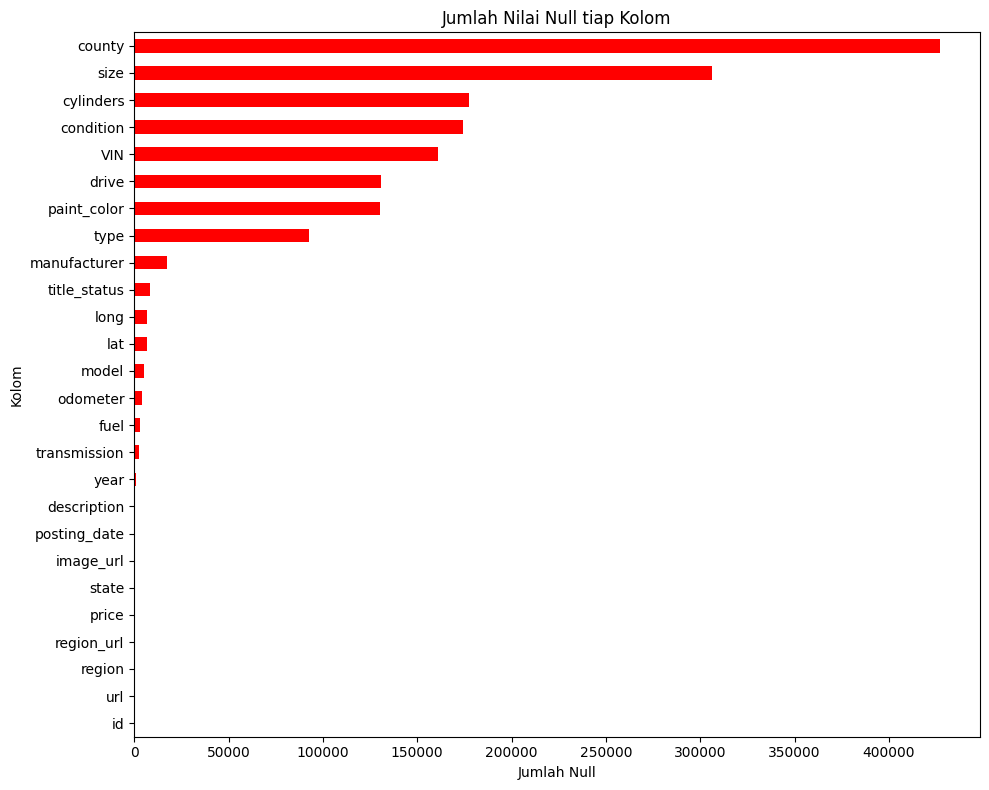

In [21]:
import matplotlib.pyplot as plt

df_null.sort_values(by='Total Null', ascending=True)['Total Null'].plot(
    kind='barh',
    color='red',
    figsize=(10, 8)
)

plt.title('Jumlah Nilai Null tiap Kolom')
plt.xlabel('Jumlah Null')
plt.ylabel('Kolom')
plt.tight_layout()
plt.show()



### Hipotesis

1. h1 : Usia kendaraan pendorong depresiasi harga mobil
2. h2 : Jarak tempuh menurunkan harga mobil
3. h3 : Merek tertentu mempertahankan harga dibandingkan lain
4. h4 : Kendaraan transimisi otomatis lebih berharga dari manual.

### Distribusi dan Outlier

